# Telecom Customer Churn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Loading the Dataset


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Mining/telecom_customer_churn.csv')

In [4]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


## Dataset Information and Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

There are 38 columns of data most of them are categorical.


In [6]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies 

There are 7043 rows some of them have null values. We can exclude the colums Offer,Churn Category and Churn Reason because most of they values are null.

In [7]:
df = df.drop(columns=['Offer', 'Churn Category', 'Churn Reason'])


###Target Column(Label)


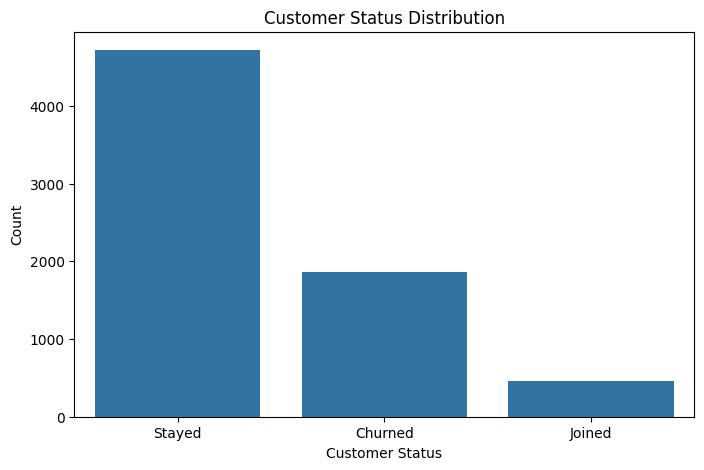

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Customer Status')
plt.title('Customer Status Distribution')
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.show()

Drop "Joined" class to create a binary classification.

In [9]:
df = df[df['Customer Status'] != 'Joined']

# Apply label encoding to the 'Customer Status' column
df['Customer Status'] = df['Customer Status'].map({'Stayed': 0, 'Churned': 1})

# Verify the transformation
df['Customer Status'].value_counts()

<ipython-input-9-430d2163b0eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer Status'] = df['Customer Status'].map({'Stayed': 0, 'Churned': 1})


,count
Customer Status,
0,4720
1,1869


###Handling Missing Data

In [10]:
columns_with_missing_values = df.isnull().sum()[df.isnull().sum() > 0]

# Display information about columns with missing values
missing_columns_info = df[columns_with_missing_values.index].info()

columns_with_missing_values

<class 'pandas.core.frame.DataFrame'>
Index: 6589 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Avg Monthly Long Distance Charges  5945 non-null   float64
 1   Multiple Lines                     5945 non-null   object 
 2   Internet Type                      5245 non-null   object 
 3   Avg Monthly GB Download            5245 non-null   float64
 4   Online Security                    5245 non-null   object 
 5   Online Backup                      5245 non-null   object 
 6   Device Protection Plan             5245 non-null   object 
 7   Premium Tech Support               5245 non-null   object 
 8   Streaming TV                       5245 non-null   object 
 9   Streaming Movies                   5245 non-null   object 
 10  Streaming Music                    5245 non-null   object 
 11  Unlimited Data                     5245 non-null   object 
dt

,0
Avg Monthly Long Distance Charges,644
Multiple Lines,644
Internet Type,1344
Avg Monthly GB Download,1344
Online Security,1344
Online Backup,1344
Device Protection Plan,1344
Premium Tech Support,1344
Streaming TV,1344
Streaming Movies,1344


There are 2 float type object lets handle them first.

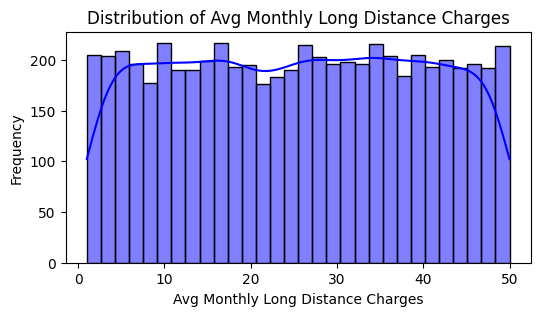

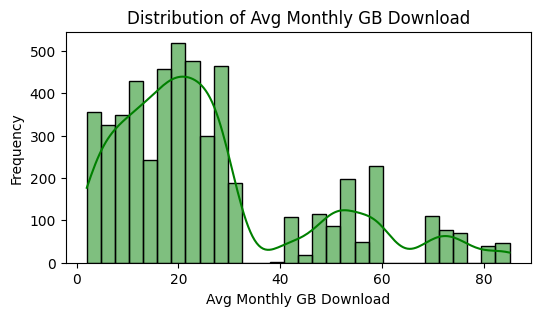

In [11]:
plt.figure(figsize=(6, 3))
sns.histplot(df['Avg Monthly Long Distance Charges'], kde=True, bins=30, color='blue')
plt.title('Distribution of Avg Monthly Long Distance Charges')
plt.xlabel('Avg Monthly Long Distance Charges')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of 'Avg Monthly GB Download'
plt.figure(figsize=(6, 3))
sns.histplot(df['Avg Monthly GB Download'], kde=True, bins=30, color='green')
plt.title('Distribution of Avg Monthly GB Download')
plt.xlabel('Avg Monthly GB Download')
plt.ylabel('Frequency')
plt.show()

Avg Monthly Long Distance Charges are spreaded equally so lets use mean.
In Avg Monthly GB Download have a skewed graph so lets use median.

In [12]:
# Update missing values
df['Avg Monthly Long Distance Charges'] = df['Avg Monthly Long Distance Charges'].fillna(df['Avg Monthly Long Distance Charges'].mean())
df['Avg Monthly GB Download'] = df['Avg Monthly GB Download'].fillna(df['Avg Monthly GB Download'].median())

# Verify that missing values are handled
missing_values_after_imputation = df[['Avg Monthly Long Distance Charges', 'Avg Monthly GB Download']].isnull().sum()
print(missing_values_after_imputation)


Avg Monthly Long Distance Charges    0
Avg Monthly GB Download              0
dtype: int64


### Encoding

In [13]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Check unique values in each categorical column
for col in categorical_columns:
    print(f"Column: {col}")
    print(f"Unique Values: {df[col].unique()[:10]}")  # Display up to 10 unique values
    print(f"Number of Unique Values: {df[col].nunique()}")
    print("-" * 40)

Column: Customer ID
Unique Values: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS']
Number of Unique Values: 6589
----------------------------------------
Column: Gender
Unique Values: ['Female' 'Male']
Number of Unique Values: 2
----------------------------------------
Column: Married
Unique Values: ['Yes' 'No']
Number of Unique Values: 2
----------------------------------------
Column: City
Unique Values: ['Frazier Park' 'Glendale' 'Costa Mesa' 'Martinez' 'Camarillo' 'Midpines'
 'Lompoc' 'Napa' 'Simi Valley' 'Sheridan']
Number of Unique Values: 1106
----------------------------------------
Column: Phone Service
Unique Values: ['Yes' 'No']
Number of Unique Values: 2
----------------------------------------
Column: Multiple Lines
Unique Values: ['No' 'Yes' nan]
Number of Unique Values: 2
----------------------------------------
Column: Internet Service
Unique Values: ['Yes' 'No']
Number of Unique Values

Dropping City and Customer_ID colums. Since IDs are unique and we have too many cities to encode. Also dropped InternetType because it has different values also nan values.

In [14]:
df = df.drop(columns=['City', 'Customer ID','Internet Type'])

In [15]:
columns_to_fill = [
    'Multiple Lines', 'Online Security', 'Online Backup',
    'Device Protection Plan', 'Premium Tech Support',
    'Streaming TV', 'Streaming Movies', 'Streaming Music',
    'Unlimited Data'
]

for col in columns_to_fill:
    df[col] = df[col].fillna('No')

Label encoding binary columns.

In [16]:
binary_columns = ['Married', 'Phone Service', 'Internet Service',
                  'Paperless Billing', 'Multiple Lines', 'Online Security',
                  'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
                  'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']

# Apply label encoding to binary columns
for col in binary_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Verify encoding
df[binary_columns].head()

,Married,Phone Service,Internet Service,Paperless Billing,Multiple Lines,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data
0,1,1,1,1,0,0,1,0,1,1,0,0,1
1,0,1,1,0,1,0,0,0,0,0,1,1,0
2,0,1,1,1,0,0,0,1,0,0,0,0,1
3,1,1,1,1,0,0,1,1,0,1,1,0,1
4,1,1,1,1,0,0,0,0,1,1,0,0,1


One-hot encoding.

In [17]:
one_hot_columns = ['Gender', 'Contract', 'Payment Method']
df = pd.get_dummies(df, columns=one_hot_columns, drop_first=False)

# Ensure all columns are encoded properly
df = df.astype(int, errors='ignore')

# Verify the final dataset structure
df.head()


,Age,Married,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,...,Total Revenue,Customer Status,Gender_Female,Gender_Male,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,37,1,0,93225,34,-118,2,9,1,42,...,974,0,1,0,0,1,0,0,1,0
1,46,0,0,91206,34,-118,0,9,1,10,...,610,0,0,1,1,0,0,0,1,0
2,50,0,0,92627,33,-117,0,4,1,33,...,415,1,0,1,1,0,0,1,0,0
3,78,1,0,94553,38,-122,1,13,1,27,...,1599,1,0,1,1,0,0,1,0,0
4,75,1,0,93010,34,-119,3,3,1,7,...,289,1,1,0,1,0,0,0,1,0


In [18]:
columns_with_missing_values = df.isnull().sum()[df.isnull().sum() > 0]
missing_columns_info = df[columns_with_missing_values.index].info()
columns_with_missing_values

<class 'pandas.core.frame.DataFrame'>
Index: 6589 entries, 0 to 7042
Empty DataFrame


,0


In [19]:
df.describe()

,Age,Married,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,...,Total Revenue,Customer Status,Gender_Female,Gender_Male,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
count,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,...,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000
mean,46.760510,0.503567,0.476097,93491.504477,35.686902,-119.303081,2.020944,34.499772,0.902261,25.003794,...,3234.719684,0.283655,0.497344,0.502656,0.485961,0.231598,0.282440,0.565791,0.382152,0.052056
std,16.841362,0.500025,0.968499,1857.575392,2.495262,2.150590,3.024016,23.968734,0.296983,13.478011,...,2854.605194,0.450805,0.500031,0.500031,0.499841,0.421886,0.450221,0.495690,0.485950,0.222158
min,19.000000,0.000000,0.000000,90001.000000,32.000000,-124.000000,0.000000,1.000000,0.000000,1.000000,...,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,92103.000000,33.000000,-121.000000,0.000000,12.000000,1.000000,14.000000,...,835.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,1.000000,0.000000,93526.000000,36.000000,-119.000000,0.000000,32.000000,1.000000,25.000000,...,2376.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,60.000000,1.000000,0.000000,95333.000000,38.000000,-117.000000,3.000000,57.000000,1.000000,36.000000,...,5106.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,80.000000,1.000000,9.000000,96150.000000,41.000000,-114.000000,11.000000,72.000000,1.000000,49.000000,...,11979.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Engineeering

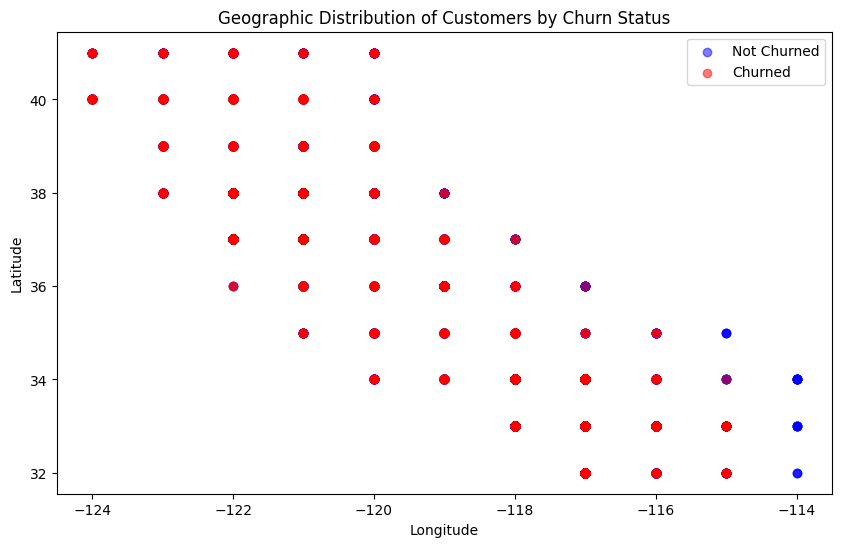

                 Latitude  Longitude  Customer Status
Latitude         1.000000  -0.868163        -0.047880
Longitude       -0.868163   1.000000         0.018233
Customer Status -0.047880   0.018233         1.000000


In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df[df['Customer Status'] == 0]['Longitude'],
    df[df['Customer Status'] == 0]['Latitude'],
    label='Not Churned', alpha=0.5, c='blue'
)
plt.scatter(
    df[df['Customer Status'] == 1]['Longitude'],
    df[df['Customer Status'] == 1]['Latitude'],
    label='Churned', alpha=0.5, c='red'
)
plt.title('Geographic Distribution of Customers by Churn Status')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Correlation analysis for geographic features
geo_correlation = df[['Latitude', 'Longitude', 'Customer Status']].corr()
print(geo_correlation)

In [21]:
# Drop geographic features
df = df.drop(columns=['Latitude', 'Longitude', 'Zip Code'])

### Correlation Analysis

In [22]:
import numpy as np

# Compute correlation matrix
corr_matrix = df.corr()

# Identify highly correlated features (absolute correlation > 0.8)
threshold = 0.8
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
highly_correlated = [(column, row) for column in upper_triangle.columns for row in upper_triangle.index if abs(upper_triangle.loc[row, column]) > threshold]

# Print highly correlated feature pairs
print("\nHighly Correlated Features (Correlation > 0.8):")
for pair in highly_correlated:
    print(f"{pair[0]} - {pair[1]}: {upper_triangle.loc[pair[1], pair[0]]}")


Highly Correlated Features (Correlation > 0.8):
Streaming Music - Streaming Movies: 0.8434587701412164
Total Charges - Tenure in Months: 0.8127961941602135
Total Revenue - Tenure in Months: 0.8409358051397788
Total Revenue - Total Charges: 0.9702660606751901
Gender_Male - Gender_Female: -1.0000000000000002
Payment Method_Credit Card - Payment Method_Bank Withdrawal: -0.8977519035051909


Make "Gender" column binary again.

In [23]:
if 'Gender_Female' in df.columns and 'Gender_Male' in df.columns:
    df['Gender'] = df['Gender_Male']  # Retain binary representation where Male = 1, Female = 0
    df = df.drop(columns=['Gender_Female', 'Gender_Male'], errors='ignore')

Combine Services as Service Count

In [24]:
# List of service-related columns to combine
service_columns = [
    'Online Security', 'Online Backup', 'Device Protection Plan',
    'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music'
]

# Create a new column 'Service Count' by summing up the services
df['Service Count'] = df[service_columns].sum(axis=1)

# Drop the original service-related columns
df = df.drop(columns=service_columns)

# Verify the updated dataset
print(df.head())


   Age  Married  Number of Dependents  Number of Referrals  Tenure in Months  \
0   37        1                     0                    2                 9   
1   46        0                     0                    0                 9   
2   50        0                     0                    0                 4   
3   78        1                     0                    1                13   
4   75        1                     0                    3                 3   

   Phone Service  Avg Monthly Long Distance Charges  Multiple Lines  \
0              1                                 42               0   
1              1                                 10               1   
2              1                                 33               0   
3              1                                 27               0   
4              1                                  7               0   

   Internet Service  Avg Monthly GB Download  ...  Total Revenue  \
0                 1     

In [25]:
df['Customer Value'] = df['Total Revenue'] / (df['Tenure in Months'].replace(0, 1))
df = df.drop(columns=['Tenure in Months', 'Total Charges', 'Total Revenue'])

In [26]:
import numpy as np

# Compute correlation matrix
corr_matrix = df.corr()

# Identify highly correlated features (absolute correlation > 0.8)
threshold = 0.8
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
highly_correlated = [(column, row) for column in upper_triangle.columns for row in upper_triangle.index if abs(upper_triangle.loc[row, column]) > threshold]

# Print highly correlated feature pairs
print("\nHighly Correlated Features (Correlation > 0.8):")
for pair in highly_correlated:
    print(f"{pair[0]} - {pair[1]}: {upper_triangle.loc[pair[1], pair[0]]}")


Highly Correlated Features (Correlation > 0.8):
Payment Method_Credit Card - Payment Method_Bank Withdrawal: -0.8977519035051909
Customer Value - Monthly Charge: 0.8518996431134029


In [27]:
df = df.drop(columns=['Customer Value', 'Payment Method_Mailed Check'])

In [28]:
df.head()

,Age,Married,Number of Dependents,Number of Referrals,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Unlimited Data,...,Total Extra Data Charges,Total Long Distance Charges,Customer Status,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Gender,Service Count
0,37,1,0,2,1,42,0,1,16,1,...,0,381,0,0,1,0,0,1,0,3
1,46,0,0,0,1,10,1,1,10,0,...,10,96,0,1,0,0,0,1,1,2
2,50,0,0,0,1,33,0,1,30,1,...,0,134,1,1,0,0,1,0,1,1
3,78,1,0,1,1,27,0,1,4,1,...,0,361,1,1,0,0,1,0,1,4
4,75,1,0,3,1,7,0,1,11,1,...,0,22,1,1,0,0,0,1,0,2


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=['Customer Status'])  # Adjust for your target column
y = df['Customer Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importances)

                              Feature  Importance
14        Total Long Distance Charges    0.153648
15            Contract_Month-to-Month    0.119103
0                                 Age    0.098829
11                     Monthly Charge    0.097327
3                 Number of Referrals    0.082076
5   Avg Monthly Long Distance Charges    0.076830
8             Avg Monthly GB Download    0.068160
17                  Contract_Two Year    0.046833
21                      Service Count    0.045964
2                Number of Dependents    0.039480
16                  Contract_One Year    0.028454
19         Payment Method_Credit Card    0.020090
20                             Gender    0.015831
10                  Paperless Billing    0.015290
1                             Married    0.014816
13           Total Extra Data Charges    0.014699
6                      Multiple Lines    0.012374
18     Payment Method_Bank Withdrawal    0.012024
12                      Total Refunds    0.011683


In [30]:
low_importance_features = [
    'Unlimited Data', 'Phone Service', 'Internet Service',
    'Total Refunds', 'Payment Method_Bank Withdrawal',
    'Multiple Lines'
]
df = df.drop(columns=low_importance_features)

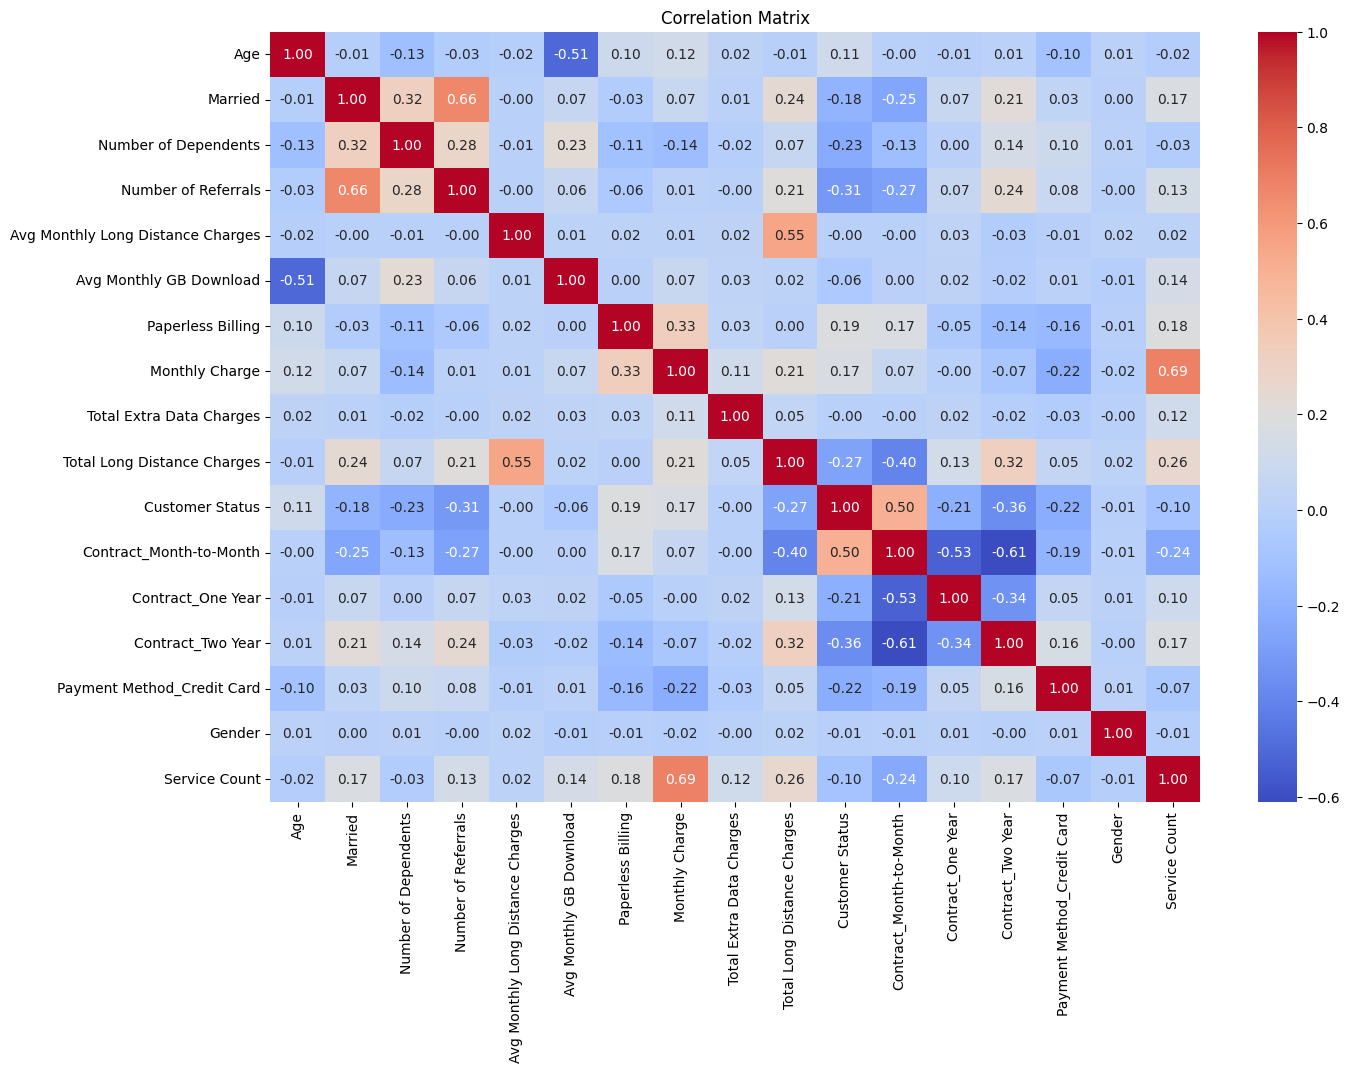

In [31]:
corr_matrix = df.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

##Normalize data

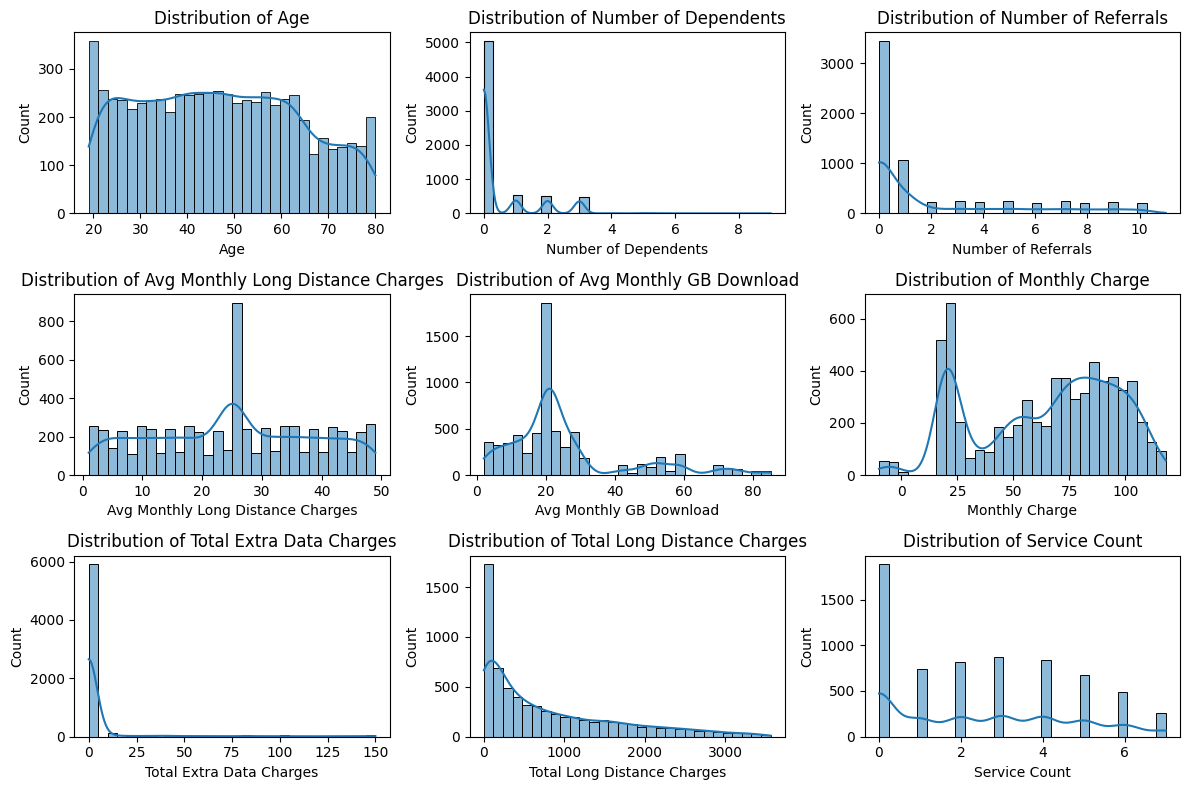

In [32]:
non_binary_columns = df.select_dtypes(include=['float64', 'int64']).columns
non_binary_columns = [col for col in non_binary_columns if df[col].nunique() > 2]

# Plot distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(non_binary_columns, 1):
    plt.subplot((len(non_binary_columns) + 2) // 3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()

plt.show()

In [33]:
df = df[df['Monthly Charge'] >= 0]

Remove Outliers


Data after outlier removal:
               Age      Married  Number of Dependents  Number of Referrals  \
count  2979.000000  2979.000000                2979.0          2979.000000   
mean     50.511581     0.236321                   0.0             0.244713   
std      15.963760     0.424893                   0.0             0.500035   
min      19.000000     0.000000                   0.0             0.000000   
25%      38.000000     0.000000                   0.0             0.000000   
50%      50.000000     0.000000                   0.0             0.000000   
75%      63.000000     0.000000                   0.0             0.000000   
max      80.000000     1.000000                   0.0             2.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        2979.000000              2979.000000   
mean                           23.819067                18.489762   
std                            13.046431                 9.382

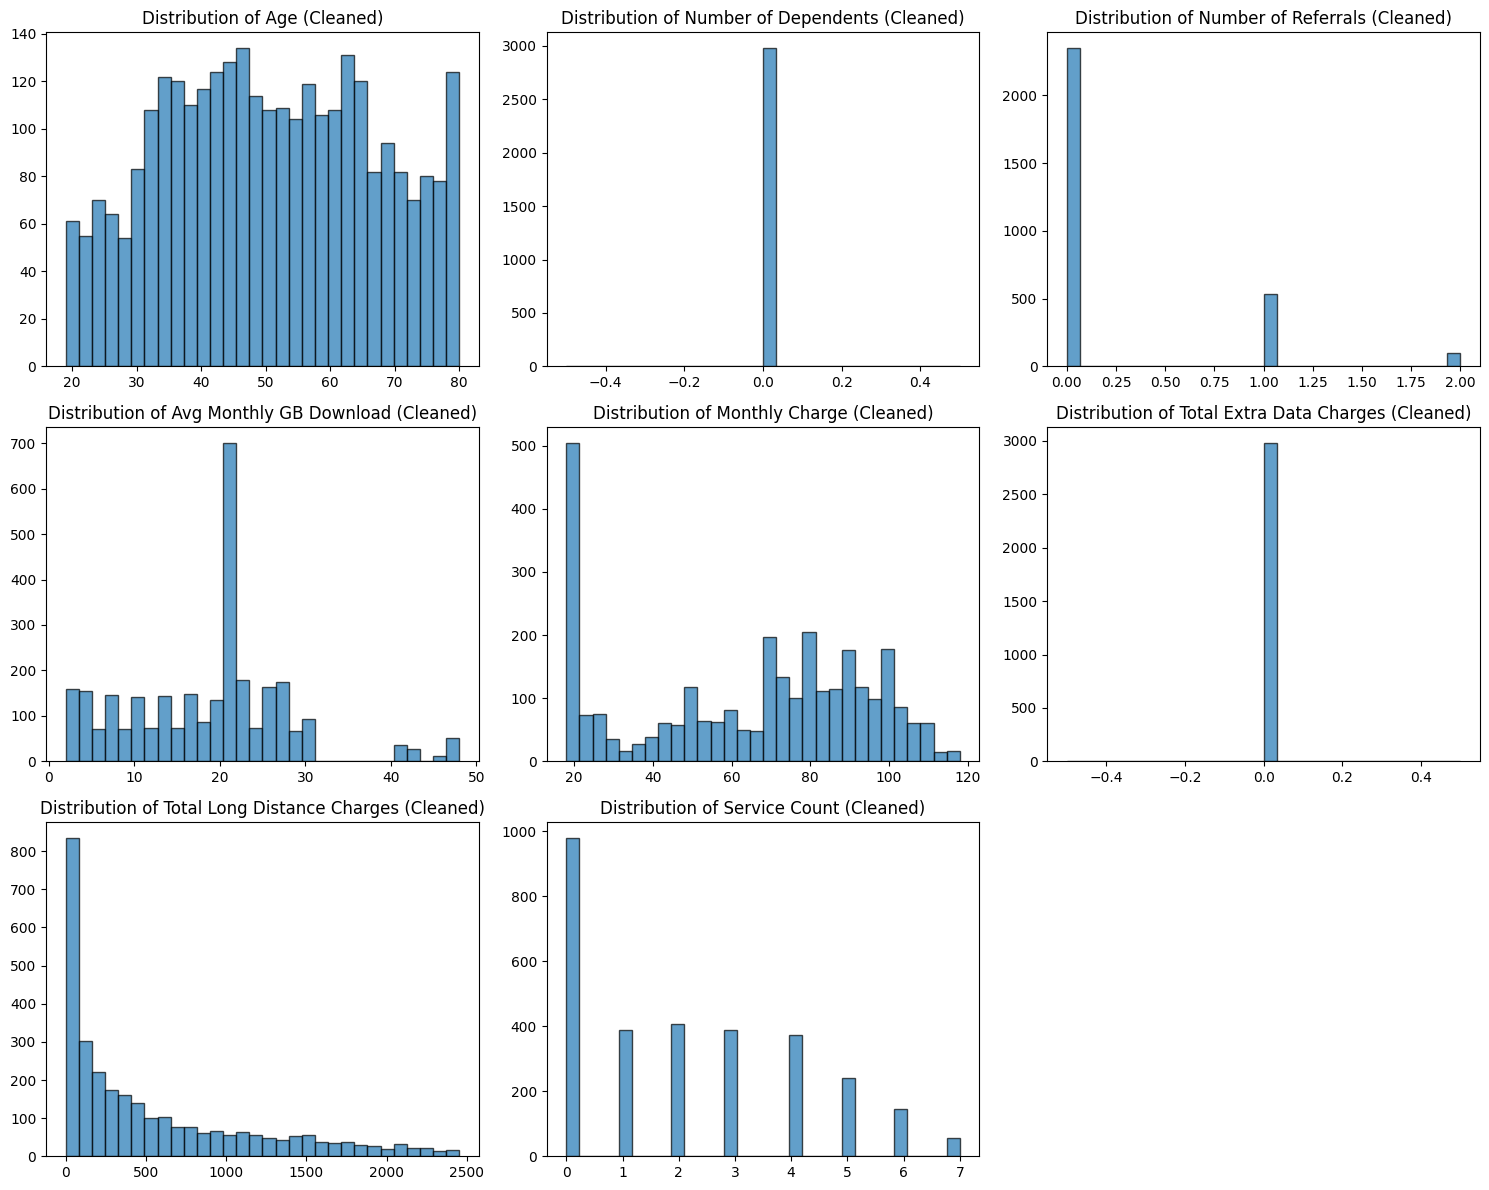

In [34]:
# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter rows within the bounds
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of columns to process
columns_to_process = [
    'Age', 'Number of Dependents', 'Number of Referrals',
    'Avg Monthly GB Download', 'Monthly Charge',
    'Total Extra Data Charges', 'Total Long Distance Charges', 'Service Count'
]

# Remove outliers for each column
for col in columns_to_process:
    df = remove_outliers_iqr(df, col)

# Check data after outlier removal
print("Data after outlier removal:")
print(df.describe())

# Recalculate skewness
print("\nSkewness after outlier removal:")
print(df.skew())

# Visualize the cleaned data distributions
plt.figure(figsize=(15, 12))
for i, col in enumerate(columns_to_process, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[col], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {col} (Cleaned)')
plt.tight_layout()
plt.show()


In [35]:
columns_to_drop = ['Number of Dependents', 'Total Extra Data Charges']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

In [36]:
df.shape[0]

2979

## Modelling

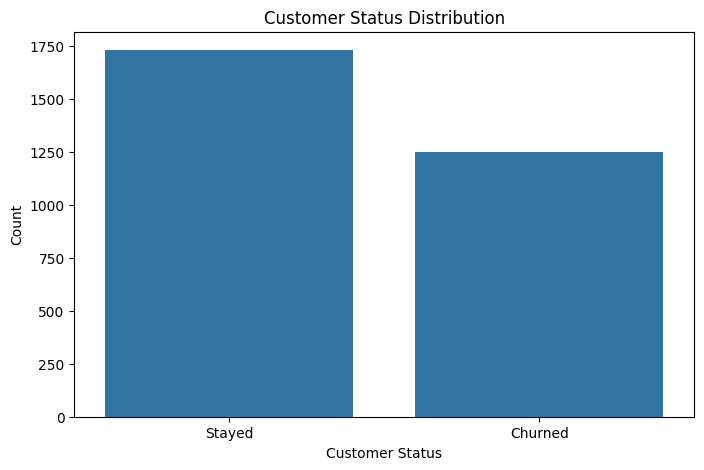

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Customer Status')
plt.title('Customer Status Distribution')
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Churned'])

plt.show()

In [38]:
X = df.drop(columns=['Customer Status'])  # Features
y = df['Customer Status']  # Target label

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Standardize features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Objective function for XGBoost
def xgb_objective(trial):
    try:
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 300),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3, log=True),
            'subsample': trial.suggest_float('subsample', 0.6, 0.8),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 0.8),
            'lambda': trial.suggest_float('lambda', 1e-2, 10.0, log=True),
            'alpha': trial.suggest_float('alpha', 1e-2, 10.0, log=True),
        }

        model = XGBClassifier(**params, eval_metric='logloss', random_state=42)
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
        return scores.mean()

    except Exception as e:
        print(f"Trial failed: {e}")
        return None

# Objective function for Random Forest
def rf_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 10, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
    }
    model = RandomForestClassifier(**params, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    return scores.mean()

# Objective function for Logistic Regression
def logistic_regression_objective(trial):
    params = {
        'C': trial.suggest_float('C', 0.01, 10.0, log=True),
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2']),
        'solver': trial.suggest_categorical('solver', ['liblinear', 'saga']),
    }
    model = LogisticRegression(**params, random_state=42, max_iter=1000)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1')  # Use scaled data
    return scores.mean()

# Run Bayesian Optimization for each model
print("Tuning XGBoost...")
xgb_study = optuna.create_study(direction='maximize')
xgb_study.optimize(xgb_objective, n_trials=50)

print("Tuning Random Forest...")
rf_study = optuna.create_study(direction='maximize')
rf_study.optimize(rf_objective, n_trials=50)

print("Tuning Logistic Regression...")
logreg_study = optuna.create_study(direction='maximize')
logreg_study.optimize(logistic_regression_objective, n_trials=100)

# Best parameters and scores
print("\nBest XGBoost Parameters:", xgb_study.best_params)
print("Best XGBoost Cross-Validation F1-score:", xgb_study.best_value)

print("\nBest Random Forest Parameters:", rf_study.best_params)
print("Best Random Forest Cross-Validation F1-score:", rf_study.best_value)

print("\nBest Logistic Regression Parameters:", logreg_study.best_params)
print("Best Logistic Regression Cross-Validation F1-score:", logreg_study.best_value)


[I 2024-12-12 18:09:44,159] A new study created in memory with name: no-name-b72e3cae-b6e0-4693-b2a2-6a0f651d9d4b


Tuning XGBoost...


[I 2024-12-12 18:09:50,697] Trial 0 finished with value: 0.7815025681765606 and parameters: {'n_estimators': 289, 'max_depth': 10, 'learning_rate': 0.2749282750163995, 'subsample': 0.6506635585227324, 'colsample_bytree': 0.6647808187476338, 'lambda': 8.439800683224464, 'alpha': 5.62941238364629}. Best is trial 0 with value: 0.7815025681765606.
[I 2024-12-12 18:09:51,518] Trial 1 finished with value: 0.7848506075525151 and parameters: {'n_estimators': 151, 'max_depth': 8, 'learning_rate': 0.01979332454894892, 'subsample': 0.6751527614978382, 'colsample_bytree': 0.6479492638941285, 'lambda': 1.900494138092411, 'alpha': 1.267497346791336}. Best is trial 1 with value: 0.7848506075525151.
[I 2024-12-12 18:09:52,516] Trial 2 finished with value: 0.7848683087178346 and parameters: {'n_estimators': 213, 'max_depth': 7, 'learning_rate': 0.023079434331849478, 'subsample': 0.7408431966266347, 'colsample_bytree': 0.7026679930088041, 'lambda': 7.811686683592533, 'alpha': 0.5215031209094735}. Best i

Tuning Random Forest...


[I 2024-12-12 18:10:48,540] Trial 0 finished with value: 0.7766274787922495 and parameters: {'n_estimators': 261, 'max_depth': 47, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.7766274787922495.
[I 2024-12-12 18:10:50,148] Trial 1 finished with value: 0.7785715254412522 and parameters: {'n_estimators': 126, 'max_depth': 22, 'min_samples_split': 2, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.7785715254412522.
[I 2024-12-12 18:10:51,662] Trial 2 finished with value: 0.7772814900969071 and parameters: {'n_estimators': 120, 'max_depth': 19, 'min_samples_split': 15, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.7785715254412522.
[I 2024-12-12 18:10:54,073] Trial 3 finished with value: 0.7774718981767329 and parameters: {'n_estimators': 170, 'max_depth': 37, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.7785715254412522.
[I 2024-12-12 18:10:55,103] Trial 4 finished with value: 0.7812153870540968 and parameters:

Tuning Logistic Regression...


[I 2024-12-12 18:12:48,150] Trial 3 finished with value: 0.751237104046975 and parameters: {'C': 1.0839288065550514, 'penalty': 'l2', 'solver': 'saga'}. Best is trial 0 with value: 0.7558098234974693.
[I 2024-12-12 18:12:48,227] Trial 4 finished with value: 0.7437628914991313 and parameters: {'C': 0.014842264470425722, 'penalty': 'l1', 'solver': 'saga'}. Best is trial 0 with value: 0.7558098234974693.
[I 2024-12-12 18:12:48,268] Trial 5 finished with value: 0.7519539472164991 and parameters: {'C': 0.08387418799521851, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.7558098234974693.
[I 2024-12-12 18:12:48,361] Trial 6 finished with value: 0.7489284268159606 and parameters: {'C': 0.2696399401016719, 'penalty': 'l1', 'solver': 'saga'}. Best is trial 0 with value: 0.7558098234974693.
[I 2024-12-12 18:12:48,411] Trial 7 finished with value: 0.7525465500573034 and parameters: {'C': 0.07550573504855869, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with valu


Best XGBoost Parameters: {'n_estimators': 237, 'max_depth': 4, 'learning_rate': 0.03500365326641728, 'subsample': 0.7322200756373324, 'colsample_bytree': 0.7555711861434723, 'lambda': 0.023581958469278876, 'alpha': 0.1574514416546251}
Best XGBoost Cross-Validation F1-score: 0.7979709442860271

Best Random Forest Parameters: {'n_estimators': 137, 'max_depth': 46, 'min_samples_split': 3, 'min_samples_leaf': 10}
Best Random Forest Cross-Validation F1-score: 0.7904854716709655

Best Logistic Regression Parameters: {'C': 0.04729087071294419, 'penalty': 'l2', 'solver': 'liblinear'}
Best Logistic Regression Cross-Validation F1-score: 0.7563310593195172


##Results

XGBoost Performance on Test Set:
Accuracy: 0.8272
F1-Score: 0.7859
AUC-ROC: 0.9029
[[304  45]
 [ 58 189]]


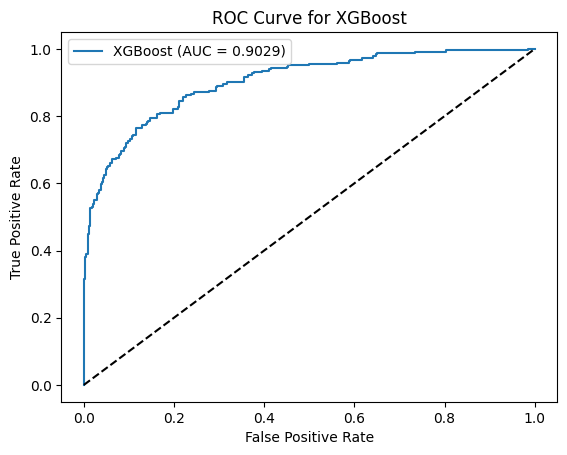

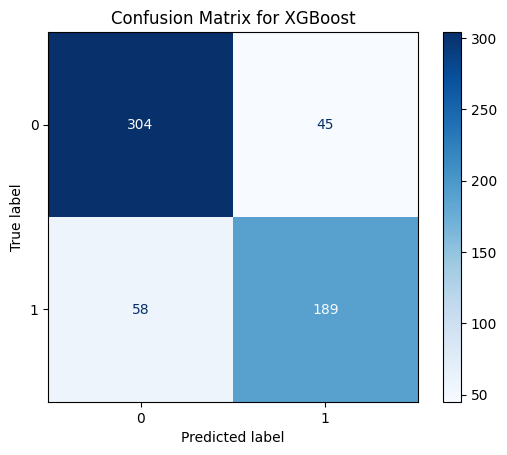

Random Forest Performance on Test Set:
Accuracy: 0.8188
F1-Score: 0.7787
AUC-ROC: 0.8927
[[298  51]
 [ 57 190]]


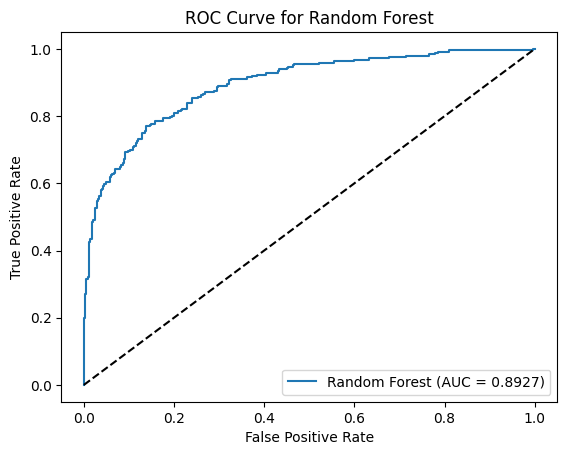

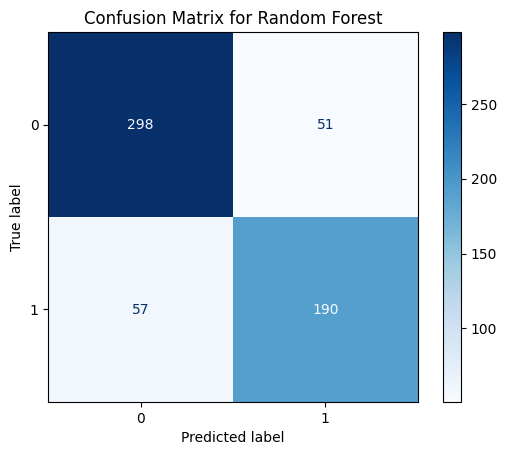

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Logistic Regression Performance on Test Set:
Accuracy: 0.7634
F1-Score: 0.7140
AUC-ROC: 0.8281
[[279  70]
 [ 71 176]]


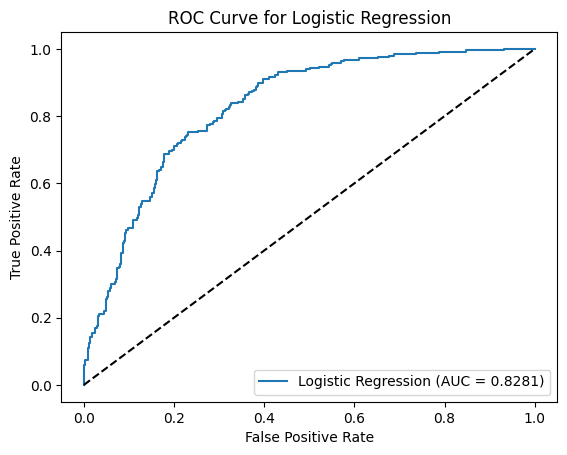

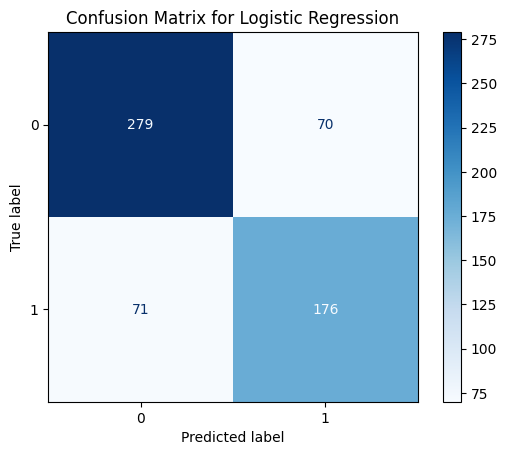

In [43]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X_test_scaled = scaler.transform(X_test)

# Function to evaluate a model
def evaluate_on_test(model, model_name, X_test, y_test):
    # Predictions and probabilities
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    # Print metrics
    print(f"{model_name} Performance on Test Set:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")
    print(cm)

    # Plot AUC-ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='best')
    plt.show()

    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# XGBoost
xgb_model = XGBClassifier(**xgb_study.best_params, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
evaluate_on_test(xgb_model, "XGBoost", X_test, y_test)

# Random Forest
rf_model = RandomForestClassifier(**rf_study.best_params, random_state=42)
rf_model.fit(X_train, y_train)
evaluate_on_test(rf_model, "Random Forest", X_test, y_test)

# Logistic Regression
logreg_model = LogisticRegression(**logreg_study.best_params, random_state=42, max_iter=1000)
logreg_model.fit(X_train, y_train)
evaluate_on_test(logreg_model, "Logistic Regression", X_test_scaled, y_test)
